In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data = np.genfromtxt("kc_house_data.csv", dtype=float, delimiter=',', names=True, invalid_raise = False)

dataset = pd.read_csv ("kc_house_data.csv")


In [3]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161400e+04,2.161500e+04,21616.000000,21616.000000,21616.000000,2.161600e+04,21616.000000,21616.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000
mean,4.579834e+09,5.399792e+05,3.370559,2.114591,2079.754950,1.510515e+04,1.494194,0.007541,0.234282,3.409253,7.656581,1788.369096,291.482073,1970.915938,84.394448,98073.401110,47.557859,-122.208238,1986.534768,12766.874208
std,2.876758e+09,3.672582e+05,0.930572,0.770390,918.621767,4.141794e+04,0.540154,0.086511,0.766285,0.651132,1.176593,828.190800,442.563449,32.288282,401.661476,669.246321,0.351919,0.843115,685.579542,27303.410683
min,0.000000e+00,-6.905000e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-122.519000,0.000000,-7350.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1424.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904926e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068725e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,0.000000,6210.000000,871200.000000


<IPython.core.display.Javascript object>


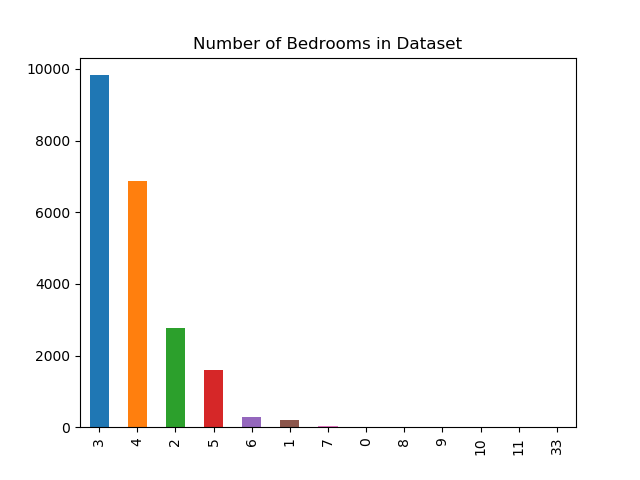

In [31]:
import matplotlib.pyplot as plt
%matplotlib notebook


plt.figure()
plt.title("Number of Bedrooms in Dataset")
dataset['bedrooms'].value_counts().plot(kind='bar')

In [ ]:
First, I perform preprocessing:
    1. I remove all rows with missing (NaN) columns
    2. I filter rows based on columns that should be positive or non-negative.
    3. Remove the id column.
    4. Add interceptor feature.

In [22]:
# Preprocessing
def missing_columns(data):
    """
    Finds and removes any rows where there are NaN columns.
    Returns the dataframe without these rows.
    """
    missing_rows_indices = data.notnull().all(axis=1)
    return data[missing_rows_indices].copy()


def out_of_range_values(data):
    impossible_negative_cols = ["bedrooms", "bathrooms", "waterfront",
                                "view", "sqft_above", "sqft_basement", "yr_built", "yr_renovated",
                                "zipcode", "sqft_living15", "sqft_lot15"]
    impossible_zero_cols = ["price", "sqft_living", "sqft_lot", "floors", "condition", "grade"]
    negative_values_filter = (data[impossible_negative_cols] >= 0).all(axis=1)
    zero_values_filter = (data[impossible_zero_cols] > 0).all(axis=1)
    return data[negative_values_filter & zero_values_filter]


def remove_id_column(data):
    return data.drop('id', 1).copy()


def add_interceptor_feature(data):
    new_data = data.copy()
    new_data["interceptor"] = 1
    return new_data

def convert_categorical_features(data):
    new_data = data.copy()
    new_data.zipcode = new_data.zipcode.astype('category')
    return new_data


In [20]:
new_dataset = missing_columns(dataset)
new_dataset = out_of_range_values(new_dataset)
new_dataset = remove_id_column(new_dataset)
new_dataset = add_interceptor_feature(new_dataset)
new_dataset = convert_categorical_features(new_dataset)
new_dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,interceptor
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0.0,3.0,...,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,1
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0.0,3.0,...,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,1
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0.0,3.0,...,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,1
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0.0,5.0,...,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,1
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0.0,3.0,...,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,1


In [ ]:
print(dataset.shape)
dataset = missing_columns(dataset)
print(dataset.shape)
dataset = out_of_range_values(dataset)
print(dataset.shape)
dataset = remove_id_column(dataset)
print(dataset.shape)
dataset = add_interceptor_feature(dataset)
print (dataset.shape)
print (dataset.dtypes)
convert_categorical_features(dataset)
print (dataset.dtypes)
print (dataset)